In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('LR Practice data.csv')
data.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
0,83.0,234.289,235.6,159.0,107.608,60.323
1,88.5,259.426,232.5,145.6,108.632,61.122
2,88.2,258.054,368.2,161.6,109.773,60.171
3,89.5,284.599,335.1,165.0,110.929,61.187
4,96.2,328.975,209.9,309.9,112.075,63.221


In [3]:
data.describe()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,3383.989632,30744.994551,19482.279926,9171.264779,2239.144062,1112.140688
std,1905.742557,17625.763439,11126.209407,5173.587165,1231.892846,607.796778
min,83.000000,234.289000,187.000000,145.600000,107.608000,60.171000
25%,1734.410625,15488.427358,9851.619375,4693.095625,1172.838137,586.041925
50%,3383.989632,30744.994550,19482.279925,9171.264780,2239.144062,1112.140688
75%,5033.568639,46001.561743,29112.940480,13649.433937,3305.449986,1638.239451
max,6683.147647,61258.128940,38743.601030,18127.603090,4371.755910,2164.338215


In [4]:
data.dtypes

GNP.deflator    float64
GNP             float64
Unemployed      float64
Armed.Forces    float64
Population      float64
Employed        float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
GNP.deflator    2938 non-null float64
GNP             2938 non-null float64
Unemployed      2938 non-null float64
Armed.Forces    2938 non-null float64
Population      2938 non-null float64
Employed        2938 non-null float64
dtypes: float64(6)
memory usage: 137.8 KB


In [6]:
data.shape

(2938, 6)

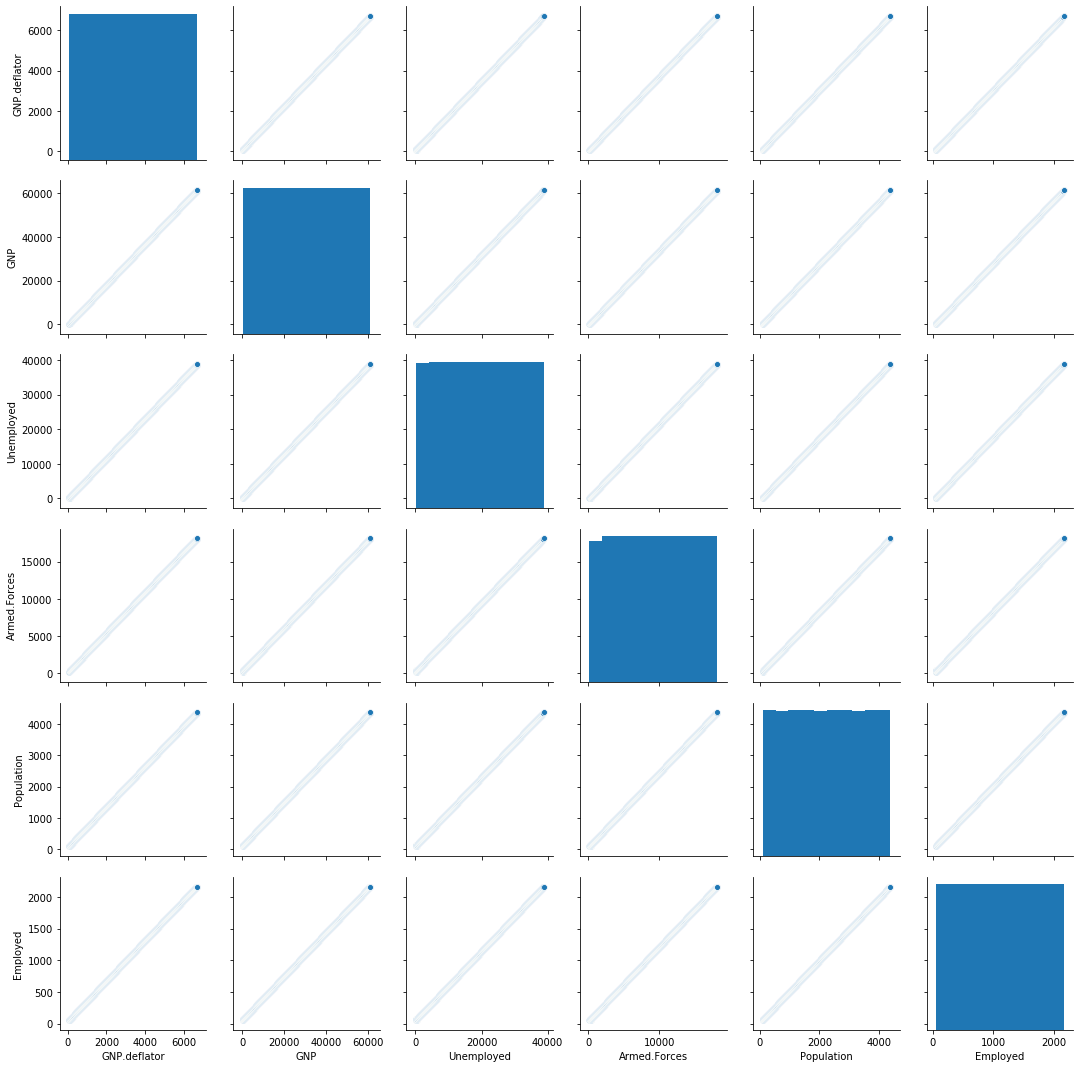

In [7]:
sns.pairplot(data)

In [8]:
# data.drop(["GNP.deflator"])

In [9]:
x=data[['GNP','Unemployed','Armed.Forces','Population']]

In [10]:
x

,GNP,Unemployed,Armed.Forces,Population
0,234.28900,235.60000,159.00000,107.608000
1,259.42600,232.50000,145.60000,108.632000
2,258.05400,368.20000,161.60000,109.773000
3,284.59900,335.10000,165.00000,110.929000
4,328.97500,209.90000,309.90000,112.075000
...,...,...,...,...
2933,61175.01519,38691.13574,18103.20721,4365.946957
2934,61195.79363,38704.25206,18109.30618,4367.399196
2935,61216.57207,38717.36838,18115.40515,4368.851434
2936,61237.35050,38730.48471,18121.50412,4370.303672


In [11]:
y=data[['Employed']]
y

,Employed
0,60.323000
1,61.122000
2,60.171000
3,61.187000
4,63.221000
...,...
2933,2161.472168
2934,2162.188679
2935,2162.905191
2936,2163.621703


In [12]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train ,y_test = train_test_split(x,y,test_size=0.5, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred=lm.predict(x_test)
y_pred

array([[ 681.15974679],
       [1335.33423955],
       [ 504.898054  ],
       ...,
       [ 196.08183671],
       [ 488.41830249],
       [ 760.6924616 ]])

In [15]:
y_test

,Employed
867,681.158862
1780,1335.334103
621,504.896968
2715,2005.272603
2717,2006.705626
...,...
2474,1832.593268
2933,2161.472168
190,196.080397
598,488.417197


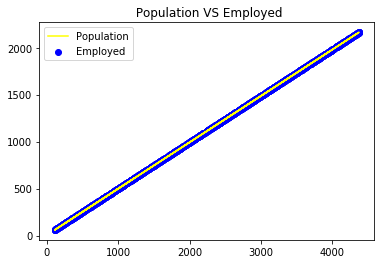

In [25]:
plt.scatter(x_train[['Population']],y_train,color='blue')
plt.plot(x_train[['Population']],lm.predict(x_train),color='yellow')
plt.legend(['Population' , 'Employed'])
plt.title(" Population VS Employed")
plt.show()

In [17]:
x_train.head()

,GNP,Unemployed,Armed.Forces,Population
1476,30900.83283,19580.65235,9217.007059,2250.035849
1639,34287.71802,21718.61309,10211.139260,2486.750681
2128,44448.37360,28132.49529,13193.535880,3196.895178
2490,51970.16771,32880.60441,15401.363240,3722.605419
1651,34537.05926,21876.00897,10284.326910,2504.177540


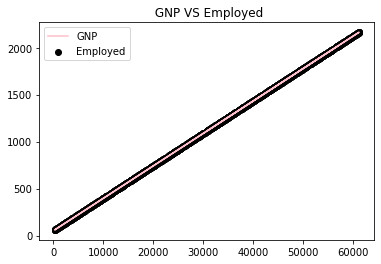

In [27]:
plt.scatter(x_train[['GNP']],y_train,color='black')
plt.plot(x_train[['GNP']],lm.predict(x_train),color='pink')
plt.legend(['GNP' , 'Employed'])
plt.title(" GNP VS Employed")
plt.show()

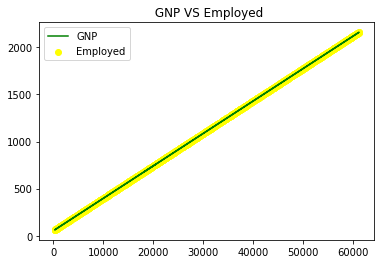

In [28]:
plt.scatter(x_test[['GNP']],y_test,color='yellow')
plt.plot(x_test[['GNP']],lm.predict(x_test),color='green')
plt.legend(['GNP' , 'Employed'])
plt.title(" GNP VS Employed")
plt.show()

In [23]:
import statsmodels.api as sm
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
predictions=model.predict(X)
model.summary()

C:\Users\Pratik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.359e+11
Date:                Wed, 29 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:32:16   Log-Likelihood:                 6295.1
No. Observations:                2938   AIC:                        -1.258e+04
Df Residuals:                    2933   BIC:                        -1.255e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           82.5951      1.334     61.914      0.000      79.979      85.211
GNP              0.0622      0.001     63.809      0.000       0.060       0.064
Unemployed      -0.0052      0.000    -29.064      0.000      -0.006      -0.005
Armed.Forces    -0.0059      0.000    -37.141      0.000      -0.006      -0.006
Population      -0.3254      0.015    -22.004      0.000      -0.354      -0.296
==============================================================================
Omnibus:                     4392.754   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         42776928.170
Skew:                           7.796   Prob(JB):                         0.00
Kurtosis:                     593.926   Cond. No.                     1.10e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""